# LSTM ANN implementation for XRP forecasting

## Libraries


Pandas, Numpy, Tensorflow, Keras and Matplotlib libraries are imported.

In [1]:
#%pip install keras
#%pip install tensorflow

# Pandas
import pandas as pd
import pandas as df
import pandas as pnd

# Matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# Numpy
import numpy as np

# Scipy
from scipy import stats

# Sklearn
from sklearn.model_selection import train_test_split

# Tensorflow
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Sequential

# Torch
import torch
import torch.nn as nn
from torch.autograd import Variable



## Data Exploration - XRP/USD 


Plots are generated for the total data as well as for the data selected for training.

--------------- Original Dataset ---------------
                           unix   symbol     open     high      low    close  \
date                                                                           
2022-11-18 00:00:00  1668729600  XRP/USD  0.38148  0.38767  0.38128  0.38330   
2022-11-17 23:00:00  1668726000  XRP/USD  0.38360  0.38411  0.38051  0.38142   
2022-11-17 22:00:00  1668722400  XRP/USD  0.38314  0.38458  0.38147  0.38377   
2022-11-17 21:00:00  1668718800  XRP/USD  0.38229  0.38421  0.38138  0.38245   
2022-11-17 20:00:00  1668715200  XRP/USD  0.38038  0.38457  0.38027  0.38243   
...                         ...      ...      ...      ...      ...      ...   
2018-05-15 10:00:00  1526378400  XRP/USD  0.73300  0.74850  0.73000  0.74090   
2018-05-15 09:00:00  1526374800  XRP/USD  0.73600  0.73750  0.73300  0.73300   
2018-05-15 08:00:00  1526371200  XRP/USD  0.74060  0.74070  0.73000  0.73600   
2018-05-15 07:00:00  1526367600  XRP/USD  0.74190  0.74600  0.73900  0.

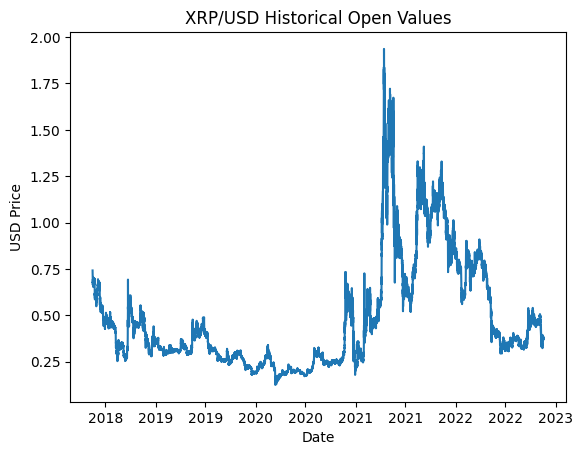



--------------- Selected Open values (Pandemic times) ---------------
                        open
date                        
2022-11-18 00:00:00  0.38148
2022-11-17 23:00:00  0.38360
2022-11-17 22:00:00  0.38314
2022-11-17 21:00:00  0.38229
2022-11-17 20:00:00  0.38038
...                      ...
2020-10-29 05:00:00  0.24587
2020-10-29 04:00:00  0.24691
2020-10-29 03:00:00  0.24547
2020-10-29 02:00:00  0.24608
2020-10-29 01:00:00  0.24515

[18000 rows x 1 columns]
Total samples XRP/USD: 18000


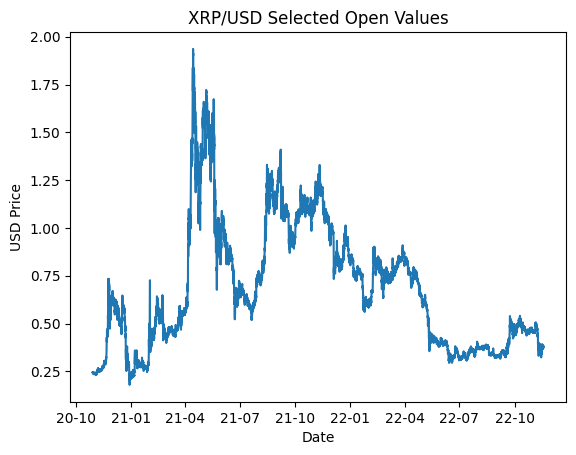

In [2]:
date_form = DateFormatter("%y-%m")
xrp = pnd.read_csv('Bitstamp_XRPUSD_1h.csv', sep=',', header=1, index_col=1, parse_dates=True)

print("--------------- Original Dataset ---------------")
print(xrp)
print(f"Total samples XRP/USD: {len(xrp)}")
print(xrp.shape)

xrp_open = pd.DataFrame(xrp, columns=["open"])
samples_number = 18000

fig, ax = plt.subplots()
plt.plot(xrp_open)
plt.title('XRP/USD Historical Open Values')
#ax.xaxis.set_major_formatter(date_form1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

print("")
print("")
print("--------------- Selected Open values (Pandemic times) ---------------")

xrp_open = xrp_open.iloc[0:samples_number]
#xrp_close = xrp_close.iloc[0:samples_number]

print(xrp_open)
print(f"Total samples XRP/USD: {len(xrp_open)}")

fig, ax = plt.subplots()
plt.plot(xrp_open)
plt.title('XRP/USD Selected Open Values')
ax.xaxis.set_major_formatter(date_form)
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()



# Pre-Processing



--------------- Selected Volumen values (Pandemic times)---------------


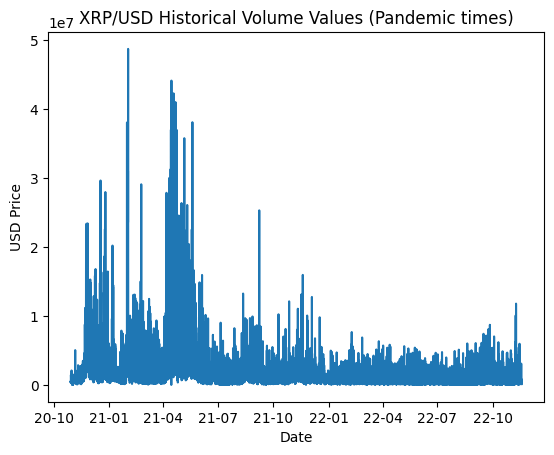

--------------- Open Values Normalized ---------------


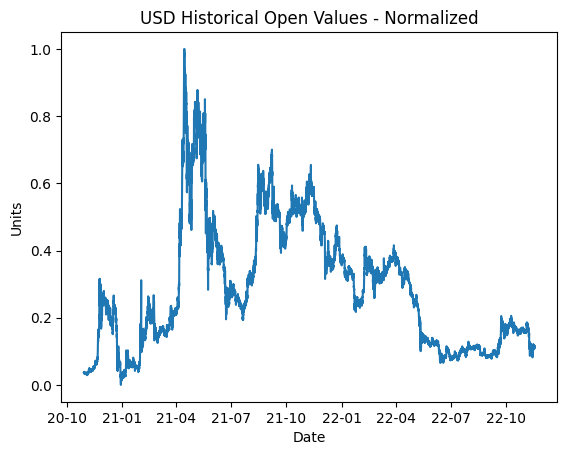



--------------- Volumen values ---------------


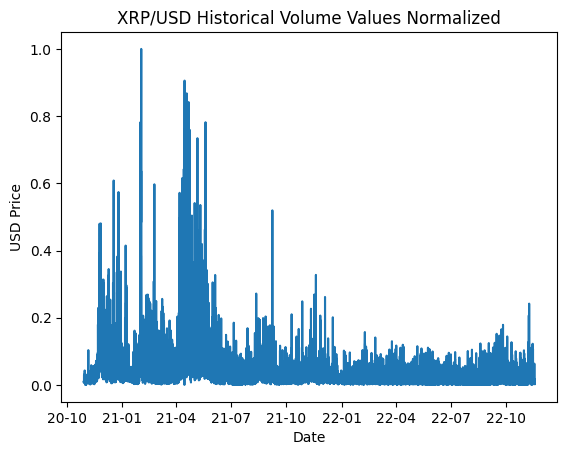



--------------- XRP OPEN NORMALIZED (k) ---------------
                         open
date                         
2022-11-18 00:00:00  0.115312
2022-11-17 23:00:00  0.116518
2022-11-17 22:00:00  0.116256
2022-11-17 21:00:00  0.115772
2022-11-17 20:00:00  0.114686
...                       ...
2020-10-29 09:00:00  0.036591
2020-10-29 08:00:00  0.037525
2020-10-29 07:00:00  0.038384
2020-10-29 06:00:00  0.038469
2020-10-29 05:00:00  0.038139

[17996 rows x 1 columns]


--------------- XRP OPEN NORMALIZED (k-1) ---------------
                          k-1
date                         
2022-11-17 23:00:00  0.116518
2022-11-17 22:00:00  0.116256
2022-11-17 21:00:00  0.115772
2022-11-17 20:00:00  0.114686
2022-11-17 19:00:00  0.113394
...                       ...
2020-10-29 08:00:00  0.037525
2020-10-29 07:00:00  0.038384
2020-10-29 06:00:00  0.038469
2020-10-29 05:00:00  0.038139
2020-10-29 04:00:00  0.038731

[17996 rows x 1 columns]


--------------- XRP OPEN NORMALIZED (k-2) ------

C:\Users\USUARIO\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_3380\3489366176.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_dataset["k-1"] = price_k1["k-1"].values
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_3380\3489366176.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i



--------------- XRP FAST STOCHASTIC OSCILLATOR ---------------
date
2022-11-18 00:00:00         NaN
2022-11-17 23:00:00         NaN
2022-11-17 22:00:00         NaN
2022-11-17 21:00:00         NaN
2022-11-17 20:00:00         NaN
                         ...   
2020-10-29 09:00:00    0.497368
2020-10-29 08:00:00    0.431579
2020-10-29 07:00:00    0.663158
2020-10-29 06:00:00    0.844737
2020-10-29 05:00:00    0.885526
Length: 17996, dtype: float64


--------------- XRP RSI ---------------
date
2022-11-18 00:00:00         NaN
2022-11-17 23:00:00         NaN
2022-11-17 22:00:00         NaN
2022-11-17 21:00:00         NaN
2022-11-17 20:00:00         NaN
                         ...   
2020-10-29 09:00:00    0.547321
2020-10-29 08:00:00    0.564260
2020-10-29 07:00:00    0.519254
2020-10-29 06:00:00    0.566868
2020-10-29 05:00:00    0.591181
Name: close, Length: 17996, dtype: float64


--------------- XRP ROC ---------------
                         open
date                         
2022

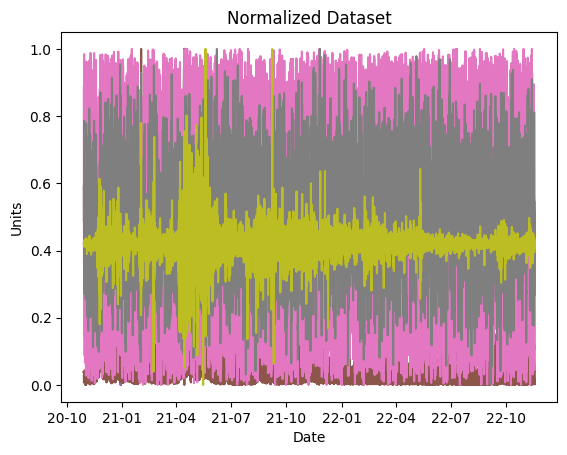

In [3]:
date_form = DateFormatter("%y-%m")
print("")
print("")
print("--------------- Selected Volumen values (Pandemic times)---------------")
xrp_volumen = pd.DataFrame(xrp, columns=["Volume USD"])
xrp_volumen = xrp_volumen.iloc[0:samples_number]

fig, ax = plt.subplots()
plt.plot(xrp_volumen)
ax.xaxis.set_major_formatter(date_form)
plt.title('XRP/USD Historical Volume Values (Pandemic times)')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

# Normalization

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

open_scaler = MinMaxScaler()
open_n  = open_scaler.fit_transform(xrp_open)
xrp_open_n = xrp_open
xrp_open_n["open"] = open_n
#inversed = open_scaler.inverse_transform(scaled)

volumen_scaler = MinMaxScaler()
volumen_n  = volumen_scaler.fit_transform(xrp_volumen)
xrp_volumen_n = xrp_volumen
xrp_volumen_n["volumen"] = volumen_n
xrp_volumen_n = xrp_volumen_n["volumen"] 
#inversed = volumen_scaler.inverse_transform(scaled)

# Plot
print("--------------- Open Values Normalized ---------------")
fig, ax = plt.subplots()
plt.plot(xrp_open_n)
ax.xaxis.set_major_formatter(date_form)
plt.title('USD Historical Open Values - Normalized')
plt.ylabel('Units')
plt.xlabel('Date')
plt.show()

print("")
print("")
print("--------------- Volumen values ---------------")

fig, ax = plt.subplots()
plt.plot(xrp_volumen_n)
ax.xaxis.set_major_formatter(date_form)
plt.title('XRP/USD Historical Volume Values Normalized')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

# Inverse function
#xrp_open= xrp_open_n*(xrp_open_n.max()-xrp_open_n.min())+xrp_open_n.min()
#volumen=volumen_n*(volumen.max()-volumen.min())+volumen.min()

#--------------------------Last 4 known prices---------------------------



price_k1 = xrp_open_n.iloc[1:len(xrp_open_n)-3] # k-1
price_k1.rename(columns = {'open':'k-1'}, inplace = True)

price_k2 = xrp_open_n.iloc[2:len(xrp_open_n)-2] # k-2
price_k2.rename(columns = {'open':'k-2'}, inplace = True)

price_k3 = xrp_open_n.iloc[3:len(xrp_open_n)-1] # k-3
price_k3.rename(columns = {'open':'k-3'}, inplace = True)

price_k4 = xrp_open_n.iloc[4:len(xrp_open_n)]   # k-4
price_k4.rename(columns = {'open':'k-4'}, inplace = True)

xrp_open_n = xrp_open_n.iloc[0:len(xrp_open_n)-4] # Truncate to have the same number of data


print("")
print("")
print("--------------- XRP OPEN NORMALIZED (k) ---------------")
print(xrp_open_n)
print("")
print("")
print("--------------- XRP OPEN NORMALIZED (k-1) ---------------")
print(price_k1)
print("")
print("")
print("--------------- XRP OPEN NORMALIZED (k-2) ---------------")
print(price_k2)
print("")
print("")
print("--------------- XRP OPEN NORMALIZED (k-3) ---------------")
print(price_k3)
print("")
print("")
print("--------------- XRP OPEN NORMALIZED (k-4) ---------------")
print(price_k4)

#--------------------------Volume------------------------------------
# Trucanting the selected data span.
xrp_volumen_n = xrp_volumen_n.iloc[0:samples_number-4]
print("")
print("")
print("--------------- XRP VOLUME NORMALIZED --------------- ")
print(xrp_volumen_n)

#--------------------------Stochastic Oscillator---------------------

periods = 14
xrp_aux = pd.DataFrame(xrp, columns=["open","close","high","low"])
high_roll = xrp_aux["high"].rolling(periods).max()
low_roll = xrp_aux["low"].rolling(periods).min()
    
# Fast stochastic indicator %K
num = xrp_aux["close"] - low_roll
denom = high_roll - low_roll
stochastic_osc_f = (num / denom) # for normalization we are avoiding *100
    
# Slow stochastic indicator %D
stochastic_osc_s = stochastic_osc_f.rolling(3).mean()

# Trucanting the selected data span.
stochastic_osc_s = stochastic_osc_s.iloc[0:samples_number-4]
stochastic_osc_f = stochastic_osc_f.iloc[0:samples_number-4]

# Normalization
stochastic_osc_s  = (stochastic_osc_s  - stochastic_osc_s.min()) / (stochastic_osc_s.max() - stochastic_osc_s.min());
stochastic_osc_f  = (stochastic_osc_f  - stochastic_osc_f.min()) / (stochastic_osc_f.max() - stochastic_osc_f.min());

print("")
print("")
print("--------------- XRP FAST STOCHASTIC OSCILLATOR ---------------")
print(stochastic_osc_f)


#------------Relative Strength Index (RSI)------

change = xrp_aux["close"].diff()

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()

# 
change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(14).mean()
avg_down = change_down.rolling(14).mean().abs()

# Calculate RSI
rsi = avg_up / (avg_up + avg_down)  # for normalization we are avoiding *100

# Trucanting the selected data span.
rsi = rsi.iloc[0:samples_number-4]

# Normalization
rsi = (rsi - rsi.min()) / (rsi.max() - rsi.min());

print("")
print("")
print("--------------- XRP RSI ---------------")
print(rsi)

#------------Rate of change (ROC)------

roc = xrp_open_n.diff()
# Trucanting the selected data span.
roc = roc.iloc[0:samples_number-4]
# Normalization
roc = (roc - roc.min()) / (roc.max() - roc.min());


print("")
print("")
print("--------------- XRP ROC ---------------")
print(roc)

#--------------------------Merge Dataset---------------------------
merged_dataset = xrp_open_n
merged_dataset["k-1"] = price_k1["k-1"].values 
merged_dataset["k-2"] = price_k2["k-2"].values 
merged_dataset["k-3"] = price_k3["k-3"].values 
merged_dataset["k-4"] = price_k4["k-4"].values 
merged_dataset["volumen"] = xrp_volumen_n.values
merged_dataset["stoch"] = stochastic_osc_f.values
merged_dataset["rsi"] = rsi.values
merged_dataset["roc"] = roc.values

#--------------------------Nan Values fill by mean---------------------------
merged_dataset.fillna(merged_dataset.mean(), inplace= True)
print("Dataset has null or nan values: ")
print(merged_dataset.isnull().values.any())
#-------------------------- Putting oldest at the beginning of the df---------------------------
merged_dataset = merged_dataset.iloc[::-1]

print("")
print("")
print("--------------- MERGED AND CLEANED DATASET ---------------")
print(merged_dataset)

fig, ax = plt.subplots()
plt.plot(merged_dataset)
ax.xaxis.set_major_formatter(date_form)
plt.title('Normalized Dataset')
plt.ylabel('Units')
plt.xlabel('Date')
plt.show()



# Tensor Generation

In [4]:
# https://charlieoneill.medium.com/predicting-the-price-of-bitcoin-with-multivariate-pytorch-lstms-695bc294130

#####
#X, y = X_nor, Y_nor
####

X_nor, Y_nor = merged_dataset.drop(columns=['open']), merged_dataset.open.values
Y_nor = Y_nor.reshape(-1, 1)

print("-------------------------------------------")
print("X NORMALIZED")
print(X_nor.shape)
print("-------------------------------------------")
print("Y NORMALIZED")
print(Y_nor.shape)


# split a multivariate sequence past, future samples (X and y)
def split_sequences(input_seq, output_seq, n_steps_in, n_steps_out):
    X, y = list(), list() # instantiate X and y
    for i in range(len(input_seq)):
        # find the end of the input, output sequence
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        # check if we are beyond the dataset
        if out_end_ix > len(input_seq): break
        # gather input and output of the pattern
        seq_x, seq_y = input_seq[i:end_ix], output_seq[end_ix-1:out_end_ix, -1]
        X.append(seq_x), y.append(seq_y)
    return np.array(X), np.array(y)


X_splitted, Y_splitted = split_sequences(X_nor, Y_nor, 100, 50)

#assert Y_splitted[0].all() == Y_nor[99:149].squeeze(1).all()


print("-------------------------------------------")
print("New shapes after splitting")
print(X_splitted.shape, Y_splitted.shape)

assert Y_splitted[0].all() == Y_nor[99:149].squeeze(1).all()

# Creating validation and test sets

total_samples = len(X_nor)
train_test_cutoff = round(0.90 * total_samples)

X_train = X_splitted[:-150]
X_test = X_splitted[-150:]

y_train = Y_splitted[0:-150]
y_test = Y_splitted[-150:] 

print("-------------------------------------------")
print("Training Shape:", X_train.shape, y_train.shape)
print("Testing Shape:", X_test.shape, y_test.shape) 


# convert to pytorch tensors
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

# reshaping to rows, timestamps, features
X_train_tensors_final = torch.reshape(X_train_tensors,   
                                      (X_train_tensors.shape[0], 100, 
                                       X_train_tensors.shape[2]))
X_test_tensors_final = torch.reshape(X_test_tensors,  
                                     (X_test_tensors.shape[0], 100, 
                                      X_test_tensors.shape[2])) 
print("-------------------------------------------")
print("TENSORS SHAPE")
print("Training Shape:", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape:", X_test_tensors_final.shape, y_test_tensors.shape) 

X_check, y_check = split_sequences(X_nor, Y_nor, 100, 50)
X_check[-1][0:8]
X_nor.iloc[-149:-145]



-------------------------------------------
X NORMALIZED
(17996, 8)
-------------------------------------------
Y NORMALIZED
(17996, 1)
-------------------------------------------
New shapes after splitting
(17848, 100, 8) (17848, 50)
-------------------------------------------
Training Shape: (17698, 100, 8) (17698, 50)
Testing Shape: (150, 100, 8) (150, 50)
-------------------------------------------
TENSORS SHAPE
Training Shape: torch.Size([17698, 100, 8]) torch.Size([17698, 50])
Testing Shape: torch.Size([150, 100, 8]) torch.Size([150, 50])


,k-1,k-2,k-3,k-4,volumen,stoch,rsi,roc
date,,,,,,,,
2022-11-11 20:00:00,0.111300,0.112432,0.109700,0.110719,0.002309,0.399834,0.532368,0.428659
2022-11-11 21:00:00,0.111009,0.111300,0.112432,0.109700,0.006216,0.544702,0.564661,0.405773
2022-11-11 22:00:00,0.109262,0.111009,0.111300,0.112432,0.007474,0.810844,0.660176,0.401891
2022-11-11 23:00:00,0.111743,0.109262,0.111009,0.111300,0.008190,0.897765,0.733531,0.411286


# LSTM Model Class

In [5]:
# Charlie O'Neill from Medium


class LSTM(nn.Module):
    
    def __init__(self, num_classes, input_size, hidden_size, num_layers, fully_connected):
        super().__init__()
        self.num_classes = num_classes # output size (# Predictions)
        self.num_layers = num_layers # number of recurrent layers in the lstm
        self.input_size = input_size # input size
        self.hidden_size = hidden_size # neurons in each lstm layer
        # LSTM model
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True, dropout=0.2) # lstm
        self.fc_1 =  nn.Linear(hidden_size, fully_connected) # fully connected 
        self.fc_2 = nn.Linear(fully_connected, num_classes) # fully connected last layer
        self.relu = nn.ReLU()
        
    def forward(self,x):
        # hidden state
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        # cell state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        # propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) # (input, hidden, and internal state)
        hn = hn.view(-1, self.hidden_size) # reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) # first dense
        out = self.relu(out) # relu
        out = self.fc_2(out) # final output
        return out

def training_loop(n_epochs, lstm, optimiser, loss_fn, X_train, y_train,
                  X_test, y_test):
    for epoch in range(n_epochs):
        lstm.train()
        outputs = lstm.forward(X_train) # forward pass
        optimiser.zero_grad() # calculate the gradient, manually setting to 0
        # obtain the loss function
        loss = loss_fn(outputs, y_train)
        loss.backward() # calculates the loss of the loss function
        optimiser.step() # improve from loss, i.e backprop
        # test loss
        lstm.eval()
        test_preds = lstm(X_test)
        test_loss = loss_fn(test_preds, y_test)
        if epoch % 100 == 0:
            print("Epoch: %d, train loss: %1.5f, test loss: %1.5f" % (epoch, 
                                                                      loss.item(), 
                                                                      test_loss.item()))

# Training


In [6]:
import warnings
warnings.filterwarnings('ignore')

n_epochs = 1000 # 1000 epochs
learning_rate = 0.001 # 0.001 lr


input_size = 8 # number of features

num_layers = 1 # number of stacked lstm layers
hidden_size = 10 # number of features in hidden state (Number of Neurons on each LSTM Layer)
fully_connected = 64 # Neurons for the last fully connected layers

num_classes = 50 # number of output classes  (50 Predicted points)


lstm = LSTM(num_classes, 
              input_size, 
              hidden_size, 
              num_layers,
              fully_connected)

loss_fn = torch.nn.MSELoss()    # mean-squared error for regression
optimiser = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

training_loop(n_epochs=n_epochs,
              lstm=lstm,
              optimiser=optimiser,
              loss_fn=loss_fn,
              X_train=X_train_tensors_final,
              y_train=y_train_tensors,
              X_test=X_test_tensors_final,
              y_test=y_test_tensors)





Epoch: 0, train loss: 0.14145, test loss: 0.02368
Epoch: 100, train loss: 0.00292, test loss: 0.00291
Epoch: 200, train loss: 0.00104, test loss: 0.00014
Epoch: 300, train loss: 0.00088, test loss: 0.00013
Epoch: 400, train loss: 0.00080, test loss: 0.00011
Epoch: 500, train loss: 0.00074, test loss: 0.00010
Epoch: 600, train loss: 0.00071, test loss: 0.00009
Epoch: 700, train loss: 0.00068, test loss: 0.00009
Epoch: 800, train loss: 0.00066, test loss: 0.00009
Epoch: 900, train loss: 0.00065, test loss: 0.00009


## Predict and plot

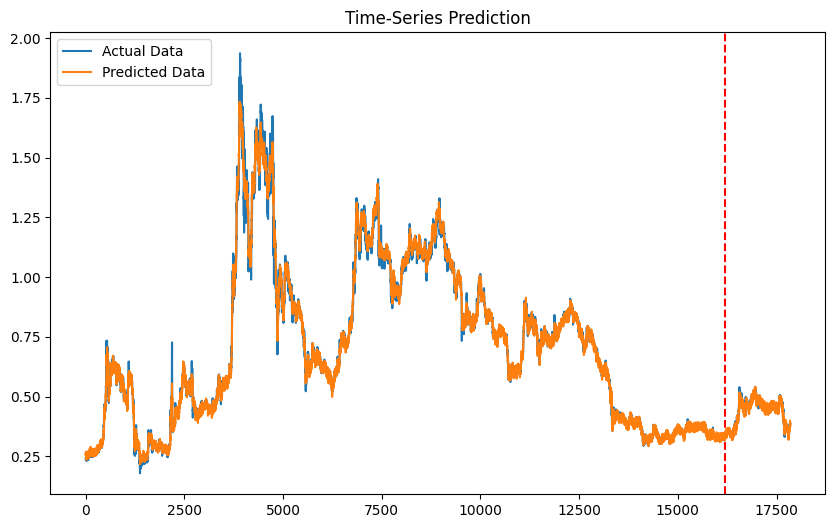

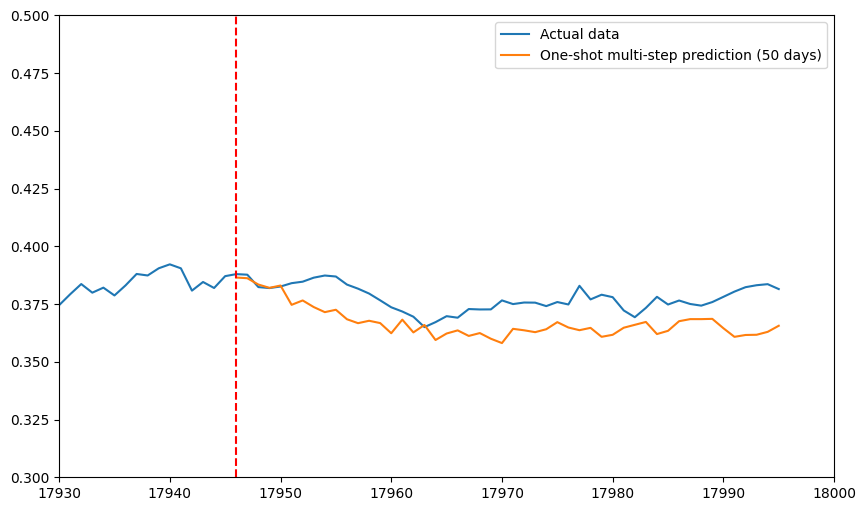

In [18]:
df_X_splitted = X_nor # old transformers
df_Y_splitted = Y_nor # old transformers

X_splitted, Y_splitted = split_sequences(X_nor, Y_nor, 100, 50)
# convert to pytorch tensors
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

# reshaping to rows, timestamps, features
X_train_tensors_final = torch.reshape(X_train_tensors,   
                                      (X_train_tensors.shape[0], 100, 
                                       X_train_tensors.shape[2]))
X_test_tensors_final = torch.reshape(X_test_tensors,  
                                     (X_test_tensors.shape[0], 100, 
                                      X_test_tensors.shape[2])) 
# split the sequence
df_X_splitted, df_Y_splitted = split_sequences(df_X_splitted, df_Y_splitted, 100, 50)
# converting to tensors
df_X_splitted = Variable(torch.Tensor(df_X_splitted))
df_Y_splitted = Variable(torch.Tensor(df_Y_splitted))
# reshaping the dataset
df_X_splitted = torch.reshape(df_X_splitted, (df_X_splitted.shape[0], 100, df_X_splitted.shape[2]))

train_predict = lstm(df_X_splitted) # forward pass
data_predict = train_predict.data.numpy() # numpy conversion
dataY_plot = df_Y_splitted.data.numpy()

data_predict = open_scaler.inverse_transform(data_predict) # reverse transformation
dataY_plot = open_scaler.inverse_transform(dataY_plot)
true, preds = [], []
for i in range(len(dataY_plot)):
    true.append(dataY_plot[i][0])
for i in range(len(data_predict)):
    preds.append(data_predict[i][0])
plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=train_test_cutoff, c='r', linestyle='--') # size of the training set

plt.plot(true, label='Actual Data') # actual plot
plt.plot(preds, label='Predicted Data') # predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.savefig("whole_plot.png", dpi=300)
plt.show() 


test_predict = lstm(X_test_tensors_final[-1].unsqueeze(0)) # get the last sample
test_predict = test_predict.detach().numpy()
test_predict = open_scaler.inverse_transform(test_predict)
test_predict = test_predict[0].tolist()

test_target = y_test_tensors[-1].detach().numpy() # last sample again
test_target = open_scaler.inverse_transform(test_target.reshape(1, -1))
test_target = test_target[0].tolist()




plt.figure(figsize=(10,6)) #plotting
a = [x for x in range(2500, len(Y_nor))]
plt.plot(a, open_scaler.inverse_transform(Y_nor[2500:]), label='Actual data');
c = [x for x in range(len(Y_nor)-50, len(Y_nor))]
plt.plot(c, test_predict, label='One-shot multi-step prediction (50 days)')
plt.axvline(x=len(Y_nor)-50, c='r', linestyle='--')
plt.legend()
plt.axis([17930, 18000, 0.3 ,0.5])
plt.show()

# Model Evaluation

In [9]:
import pprint

y_pred = np.array(test_predict)
y_true = np.array(test_target)

# Mean absolute percentage error
mape = np.mean (np.abs (y_pred - y_true)/np.abs (y_true)) 
# Mean absolute error
mae = np.mean(np.abs (y_pred - y_true))
# Mean percentage error
mpe = np.mean( (y_pred - y_true)/y_true)
# RMSE
rmse = np.mean ( (y_pred - y_true)**2)**.5 
# Correlation Coefficient
corr = np.corrcoef(y_pred, y_true)

pprint.pprint({'mape' :mape, 
                'mae': mae,
                'mpe' : mpe,
                'rmse' :rmse,
                'corr': corr})



{'corr': array([[1.        , 0.57556051],
       [0.57556051, 1.        ]]),
 'mae': 0.010560150742530822,
 'mape': 0.02790555479273338,
 'mpe': -0.027633014441605583,
 'rmse': 0.011994844014233737}
